# Курсовая работа

## Тема: Влияние фильмов, входящих в общую коллекцию на кассовые сборы и бюджет

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [220]:
data = pd.read_csv('train.csv')

In [221]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

### Подготавливаем данные к дальнешему исследованию

Удаляем лишние столбцы

In [223]:
data.drop(['imdb_id','poster_path', 'homepage', 'production_companies','production_countries', 'tagline', 'Keywords'],axis=1,inplace=True)

Вводим критерий коллекции

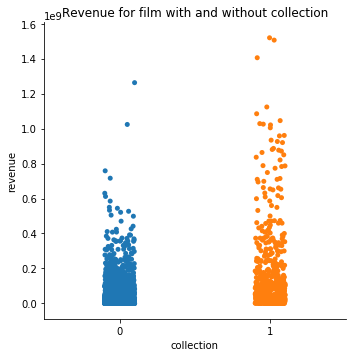

In [224]:
data['collection'] = 0
data.loc[data['belongs_to_collection'].isnull() == False, 'collection'] = 1

sns.catplot(x='collection', y='revenue', data=data);
plt.title('Revenue for film with and without collection');

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   original_language      3000 non-null   object 
 5   original_title         3000 non-null   object 
 6   overview               2992 non-null   object 
 7   popularity             3000 non-null   float64
 8   release_date           3000 non-null   object 
 9   runtime                2998 non-null   float64
 10  spoken_languages       2980 non-null   object 
 11  status                 3000 non-null   object 
 12  title                  3000 non-null   object 
 13  cast                   2987 non-null   object 
 14  crew                   2984 non-null   object 
 15  reve

In [226]:
data=data.drop(['belongs_to_collection'],axis =1)

Создаем датасет для фильмов коллекций и оригинальных фильмов

In [227]:
collection = data.loc[data['collection'] != 0]

In [228]:
collection.head()

,id,budget,genres,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Muppet Treasure Island,"[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1
10,11,1000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,11/21/76,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Rocky,"[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147,1
11,12,0,"[{'id': 35, 'name': 'Comedy'}]",en,Revenge of the Nerds II: Nerds in Paradise,The members of the Lambda Lambda Lambda frater...,10.543750,7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Revenge of the Nerds II: Nerds in Paradise,"[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033,1


In [229]:
original = data.loc[data['collection'] != 1]

In [230]:
original.head()

,id,budget,genres,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,collection
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pinocchio and the Emperor of the Night,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,0
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,0


In [182]:
collection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 2991
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 604 non-null    int64  
 1   budget             604 non-null    int64  
 2   genres             604 non-null    object 
 3   original_language  604 non-null    object 
 4   original_title     604 non-null    object 
 5   overview           603 non-null    object 
 6   popularity         604 non-null    float64
 7   release_date       604 non-null    object 
 8   runtime            604 non-null    float64
 9   spoken_languages   603 non-null    object 
 10  status             604 non-null    object 
 11  title              604 non-null    object 
 12  cast               599 non-null    object 
 13  crew               599 non-null    object 
 14  revenue            604 non-null    int64  
 15  collection         604 non-null    int64  
dtypes: float64(2), int64(4), 

In [183]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 2 to 2999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2396 non-null   int64  
 1   budget             2396 non-null   int64  
 2   genres             2389 non-null   object 
 3   original_language  2396 non-null   object 
 4   original_title     2396 non-null   object 
 5   overview           2389 non-null   object 
 6   popularity         2396 non-null   float64
 7   release_date       2396 non-null   object 
 8   runtime            2394 non-null   float64
 9   spoken_languages   2377 non-null   object 
 10  status             2396 non-null   object 
 11  title              2396 non-null   object 
 12  cast               2388 non-null   object 
 13  crew               2385 non-null   object 
 14  revenue            2396 non-null   int64  
 15  collection         2396 non-null   int64  
dtypes: float64(2), int64(4),

### Выделяем таблицы фильмов, состоящих в коллекциях и оригинальных

Делаем предположение, что фильмы являющиеся частью коллекцию собирают больше денег, чем оригинальные ленты

Выделяем выборку из 500 фильмов из каждого датасета для дальнейшего исследования 

In [184]:
n_sample = 500

y1 = collection.sample(n=n_sample, random_state=42)
y2 = original.sample(n=n_sample, random_state=42)


n1 = len(y1)
n2 = len(y2)

n = n1 + n2
k = 2

print(n1, n2, n)

500 500 1000


In [185]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 542 to 300
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   budget             500 non-null    int64  
 2   genres             500 non-null    object 
 3   original_language  500 non-null    object 
 4   original_title     500 non-null    object 
 5   overview           499 non-null    object 
 6   popularity         500 non-null    float64
 7   release_date       500 non-null    object 
 8   runtime            500 non-null    float64
 9   spoken_languages   499 non-null    object 
 10  status             500 non-null    object 
 11  title              500 non-null    object 
 12  cast               496 non-null    object 
 13  crew               496 non-null    object 
 14  revenue            500 non-null    int64  
 15  collection         500 non-null    int64  
dtypes: float64(2), int64(4),

Выделяем сборы в отдельные таблицы для коллекции и оригинальных фильмов

In [186]:
y1_rev = y1['revenue']

In [188]:
y2_rev = y2['revenue']

In [189]:
y1_rev_mean = np.mean(y1_rev)
y2_rev_mean = np.mean(y2_rev)

y1_rev_s2 = np.var(y1_rev, ddof=1)
y2_rev_s2 = np.var(y2_rev, ddof=1)


print(f'Фильмы из коллекций: mean = {np.round(y1_rev_mean, 4)}, std = {np.round(y1_rev_s2**0.5, 4)}')
print(f'Оригинальные фильмы: mean = {np.round(y2_rev_mean, 4)}, std = {np.round(y2_rev_s2**0.5, 4)}')


Belong to collection: mean = 161183991.308, std = 235654949.2024
Original movies: mean = 38154751.12, std = 67615423.6941


Проверяем зависимость на графике. 0 - оригинальные фильмы, 1 - фильмы, входящие в состав коллекции

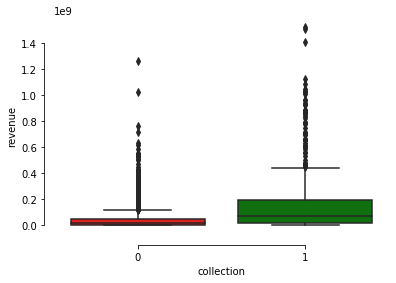

In [190]:
movies = pd.concat([collection, original]).reset_index(drop=True)

sns.boxplot(x="collection", y="revenue", palette=["r", "g"], data=movies)
sns.despine(offset=10, trim=True)

### Проверяем гипотезу влияния принадлежности фильма к коллекции на сборы

In [191]:
y = np.concatenate([y1_rev, y2_rev])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Общие сборы: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Total revenue: mean = 99669371.214, std = 183875784.1347


In [192]:
ss_g = np.sum((y - y_mean)**2)
ss_f = ((y1_rev_mean - y_mean)**2) * n1 + ((y2_rev_mean - y_mean)**2) * n2
ss_r = np.sum((y1_rev - y1_rev_mean)**2) + np.sum((y2_rev - y2_rev_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(ss_f, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(ss_r, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 3.3776493687171797e+19
Сумма квадратов отклонений средних групповых значений от общего среднего: 3.7840484853091487e+18
Остаточная сумма квадратов отклонений: 2.9992445201862648e+19


In [193]:
s2_g = ss_g / (n - 1)
s2_f = ss_f / (k - 1)
s2_r = ss_r / (n - k)

print(f'Общая дисперсия: {np.round(s2_g, 4)}')
print(f'Факторная дисперсия: {np.round(s2_f, 4)}')
print(f'Остаточная дисперсия: {np.round(s2_r, 4)}')

Общая дисперсия: 3.3810303991162956e+16
Факторная дисперсия: 3.7840484853091487e+18
Остаточная дисперсия: 3.005255030246758e+16


In [194]:
k1 = k - 1
k2 = n - k

In [195]:
F = s2_f / s2_r
print(F)

125.91438820413336


Зафиксируем уровень значимости  𝛼=0.05 . Для него найдём критическое значение  𝐹𝑐𝑟𝑖𝑡 

In [196]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.850793370783879

F = 125.91
F_critical = 3.85
Полученное значение F = 125.91 > Fкрит = 3.85

Из этого следует, что фильмы, относящиеся к коллекции имеют больше шансов собрать большую кассу.

### Проверяем возможность получения большего бюджета фильмам коллекции

Чистим датасеты от пустых значений

In [197]:
collection = collection.loc[collection['budget'] != 0]
original = original.loc[original['budget'] != 0]

In [198]:
collection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 2991
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 498 non-null    int64  
 1   budget             498 non-null    int64  
 2   genres             498 non-null    object 
 3   original_language  498 non-null    object 
 4   original_title     498 non-null    object 
 5   overview           497 non-null    object 
 6   popularity         498 non-null    float64
 7   release_date       498 non-null    object 
 8   runtime            498 non-null    float64
 9   spoken_languages   498 non-null    object 
 10  status             498 non-null    object 
 11  title              498 non-null    object 
 12  cast               493 non-null    object 
 13  crew               493 non-null    object 
 14  revenue            498 non-null    int64  
 15  collection         498 non-null    int64  
dtypes: float64(2), int64(4), 

In [199]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 2 to 2999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1690 non-null   int64  
 1   budget             1690 non-null   int64  
 2   genres             1685 non-null   object 
 3   original_language  1690 non-null   object 
 4   original_title     1690 non-null   object 
 5   overview           1685 non-null   object 
 6   popularity         1690 non-null   float64
 7   release_date       1690 non-null   object 
 8   runtime            1689 non-null   float64
 9   spoken_languages   1683 non-null   object 
 10  status             1690 non-null   object 
 11  title              1690 non-null   object 
 12  cast               1683 non-null   object 
 13  crew               1682 non-null   object 
 14  revenue            1690 non-null   int64  
 15  collection         1690 non-null   int64  
dtypes: float64(2), int64(4),

Выделяем выборку из 400 фильмов в каждом датасете

In [200]:
n_sample = 400

y1 = collection.sample(n=n_sample, random_state=42)
y2 = original.sample(n=n_sample, random_state=42)


n1 = len(y1)
n2 = len(y2)

n = n1 + n2
k = 2

print(n1, n2, n)

400 400 800


Создаем отдельные таблицы с бюджетами

In [201]:
y1_bud = y1['budget']
y2_bud = y2['budget']

In [202]:
y1_mean = np.mean(y1_bud)
y2_mean = np.mean(y2_bud)

y1_s2 = np.var(y1_bud, ddof=1)
y2_s2 = np.var(y2_bud, ddof=1)


print(f'Фильмы из коллекций: mean = {y1_mean}, std = {np.round(y1_s2**0.5, 4)}')
print(f'Оригинальные фильмы: mean = {np.round(y2_mean, 4)}, std = {np.round(y2_s2**0.5, 4)}')


Belong to collection: mean = 44018649.1525, std = 54957155.3743
Original movies: mean = 24648174.8925, std = 28033696.0653


Проверяем зависимость на графике. 0 - оригинальные фильмы, 1 - фильмы из коллекции

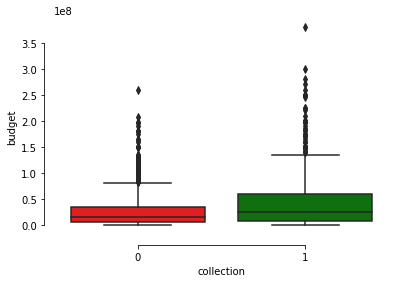

In [203]:
movies = pd.concat([collection, original]).reset_index(drop=True)

sns.boxplot(x="collection", y="budget", palette=["r", "g"], data=movies)
sns.despine(offset=10, trim=True)

In [204]:
y = np.concatenate([y1_bud, y2_bud])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Общий бюджет: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Total revenue: mean = 34333412.0225, std = 44661257.2908


In [205]:
ss_g = np.sum((y - y_mean)**2)
S2_b = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2
S2_w = np.sum((y1_bud - y1_mean)**2) + np.sum((y2_bud - y2_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(S2_b, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(S2_w, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 1.5937076943365033e+18
Сумма квадратов отклонений средних групповых значений от общего среднего: 7.504305461146454e+16
Остаточная сумма квадратов отклонений: 1.5186646397250388e+18


Записываем оценки дисперсий:

In [206]:
k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

Значение статистики  𝐹 :

In [207]:
F = sigma2_b / sigma2_w
print(F)

39.432245943904405


Зафиксируем уровень значимости  𝛼=0.05 . Для него найдём критическое значение  𝐹𝑐𝑟𝑖𝑡 :

In [208]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
print(F_crit)

3.853138126495274


F = 39.43
F_critical = 3.85
Полученное значение F = 39.43 > Fкрит = 3.85

Из этого следует, что фильмы, относящиеся к коллекции имеют больше шансов получить больший бюджет.